# Problem Statement


### "How can we increase sales of Bigmart Outlets in different cities?"

The aim is to build a sales predictive model for finding out sales of each product at particular store and use this model to understand relations of properties of products and stores with sales which will help Bigmart in increasing sales. Some data of products and stores are missing , we will use effective techniques to handle missing data.


# Hypothesis Generation

## Hypothesis

### Based on Demographics features

* More the population around store, more the sales.
* More the average income of people around store, more the sales.
* More the average age of people around store, less the sales.

### Based on Product

* Some categories of product generates more sales.
* People are more likely to buy healthy products
* More the product visibility, more the sales.
* More the product availability, more the sales.
* Less the product price, more the sales.

### Based on Store

* More the store size, more the sales
* More posh location means more the sales.
* More the time store is opened, more is the sales.
* Less the competition of store, more the sales.

### Based on Weather

* Poor weather of city leads to less sales.

# Loading Packages and Data

## Loading Packages and libraries

In [543]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import collections


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

import pickle


## Loading Data

In [482]:
def load_data(file):
    """Reads data from file passed as argument and returns it as dataframe.
    Arguments:
                file: name/path of file containing data
    Returns:
                Dataframe containing file data
    """
    data_df=pd.read_csv(file)
    #print(data_df)
    return data_df

In [483]:
train_data,test_data=load_data("Train.csv"),load_data("Test.csv")


# Data Structure and Content 

In [484]:
# Shape of training Dataset

train_data.shape     

(8523, 12)

In [485]:
# sample rows of training Dataset

train_data.sample(10)    

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6168,DRJ24,11.800,Low Fat,0.113505,Soft Drinks,186.8924,OUT049,1999,Medium,Tier 1,Supermarket Type1,2961.4784
4763,FDF39,14.850,Regular,0.019551,Dairy,263.7910,OUT045,2002,NaN,Tier 2,Supermarket Type1,4207.8560
6970,DRH36,16.200,Low Fat,0.033380,Soft Drinks,74.0696,OUT046,1997,Small,Tier 1,Supermarket Type1,1416.8224
3236,FDK14,6.980,Low Fat,0.041098,Canned,81.6934,OUT035,2004,Small,Tier 2,Supermarket Type1,818.9340
5493,DRF23,4.610,Low Fat,0.000000,Hard Drinks,173.8396,OUT046,1997,Small,Tier 1,Supermarket Type1,1221.0772
4203,FDA21,13.650,Low Fat,0.036017,Snack Foods,186.3924,OUT049,1999,Medium,Tier 1,Supermarket Type1,1295.6468
416,FDF11,10.195,Regular,0.017628,Starchy Foods,239.6538,OUT035,2004,Small,Tier 2,Supermarket Type1,2403.5380
631,FDL20,17.100,Low Fat,0.128675,Fruits and Vegetables,112.3886,OUT045,2002,NaN,Tier 2,Supermarket Type1,2334.9606
6157,FDR04,7.075,Low Fat,0.022548,Frozen Foods,95.7068,OUT013,1987,High,Tier 3,Supermarket Type1,583.2408
1557,NCT29,12.600,Low Fat,0.064241,Health and Hygiene,121.9414,OUT045,2002,NaN,Tier 2,Supermarket Type1,1462.0968


In [486]:
#Information about columns/attributes of training dataset

train_data.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Numerical Features                                           
* Item_Weight                                     
* Item_Visibility  
* Item_MRP
* Outlet_Establishment_Year
* Item_Outlet_Sales

### Categorical Features    
* Item_Identifier                                     
* Item_Fat_Content   
* Item_Type
* Outlet_Identifier    
* Outlet_Size 
* Outlet_Location_Type
* Outlet_Type

# Exploratory Data Analysis

In [487]:
#Count,mean, Standard Deviation ,minimum ,first quartiles, second Quartiles, Third Quartiles and maximum values of each column

train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [488]:
#Grouping training Dataset based on Outlet_identifier and Item_type 

grp_outlet=train_data.groupby(["Outlet_Identifier","Item_Type"])    
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(grp_outlet.size())
    
    

Outlet_Identifier  Item_Type            
OUT010             Baking Goods              42
                   Breads                    17
                   Breakfast                  9
                   Canned                    35
                   Dairy                     43
                   Frozen Foods              54
                   Fruits and Vegetables     79
                   Hard Drinks               16
                   Health and Hygiene        37
                   Household                 67
                   Meat                      34
                   Others                    10
                   Seafood                    4
                   Snack Foods               71
                   Soft Drinks               28
                   Starchy Foods              9
OUT013             Baking Goods              73
                   Breads                    25
                   Breakfast                 13
                   Canned                    65

In [489]:
#Grouping training Dataset based on Outlet_identifier and Item_type 

grp_outlet=train_data.groupby(["Outlet_Identifier","Item_Type"])  
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        display(grp_outlet.describe())


Item_Weight                       \
                                              count       mean       std   
Outlet_Identifier Item_Type                                                
OUT010            Baking Goods                 42.0  12.605833  4.875448   
                  Breads                       17.0  12.696176  4.457907   
                  Breakfast                     9.0  13.686111  5.439687   
                  Canned                       35.0  12.266000  4.410711   
                  Dairy                        43.0  13.910465  4.823599   
                  Frozen Foods                 54.0  13.072500  4.644329   
                  Fruits and Vegetables        79.0  13.833418  4.682391   
                  Hard Drinks                  16.0  10.838750  3.813653   
                  Health and Hygiene           37.0  12.609730  4.443269   
                  Household                    67.0  12.522015  4.740577   
                  Meat                         34.0  12.565441  4.494523   
                  Others                       10.0  15.570000  3.407606   
                  Seafood                       4.0   7.787500  2.068488   
                  Snack Foods                  71.0  13.069296  4.616949   
                  Soft Drinks                  28.0  12.070893  4.839047   
                  Starchy Foods                 9.0  12.577222  4.446335   
OUT013            Baking Goods                 73.0  12.036918  4.826103   
                  Breads                       25.0  11.048000  4.175421   
                  Breakfast                    13.0  12.564231  5.227841   
                  Canned                       65.0  11.922231  4.513856   
                  Dairy                        80.0  13.071875  4.914713   
                  Frozen Foods                 92.0  13.250707  4.448103   
                  Fruits and Vegetables       142.0  13.259613  4.605962   
                  Hard Drinks                  23.0  11.741957  4.523161   
                  Health and Hygiene           61.0  13.028770  4.594411   
                  Household                   103.0  14.033398  4.981803   
                  Meat                         41.0  13.384268  4.372438   
                  Others                       16.0  14.008437  4.348827   
                  Seafood                       5.0  13.002000  5.839236   
                  Snack Foods                 125.0  13.404560  4.548466   
                  Soft Drinks                  49.0  12.233776  4.600791   
                  Starchy Foods                19.0  13.562632  4.434313   
OUT017            Baking Goods                 73.0  12.128425  4.710234   
                  Breads                       22.0  11.463636  5.007312   
                  Breakfast                    12.0  12.371667  5.311311   
                  Canned                       69.0  12.391667  4.519303   
                  Dairy                        74.0  12.824459  4.499651   
                  Frozen Foods                106.0  12.614387  4.313358   
                  Fruits and Vegetables       127.0  13.084961  4.624709   
                  Hard Drinks                  22.0  11.587955  3.958280   
                  Health and Hygiene           61.0  12.774344  4.651903   
                  Household                    95.0  13.075842  5.143282   
                  Meat                         44.0  13.388068  4.818389   
                  Others                       16.0  13.433125  4.795575   
                  Seafood                       5.0  11.377000  5.593835   
                  Snack Foods                 128.0  13.427344  4.399849   
                  Soft Drinks                  54.0  12.444444  4.259570   
                  Starchy Foods                18.0  14.474722  3.109653   
OUT018            Baking Goods                 68.0  11.987868  4.580403   
                  Breads                       27.0  11.937037  4.589287   
            

In [490]:
#Grouping training Dataset based on Item_type 

grp_outlet=train_data.groupby(["Item_Type"])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(grp_outlet.size())

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
dtype: int64


In [491]:
#Number of unique values in each columns

train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [492]:
# Checking for Duplicates rows

train_data.duplicated().sum()

0

In [493]:
#Check for missing values in each column/attribute

train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Shape of Training Dataset :  8523 rows and 12 columns
#### Number of Duplicate rows in training dataset : 0 
####  Attributes containing Null Values in training dataset : Item_Weight(1463 ) and Outlet_Size(2410)

## EDA -outliers

In [494]:
grp_outlet=train_data.groupby("Outlet_Identifier")    
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(grp_outlet.size())
    

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

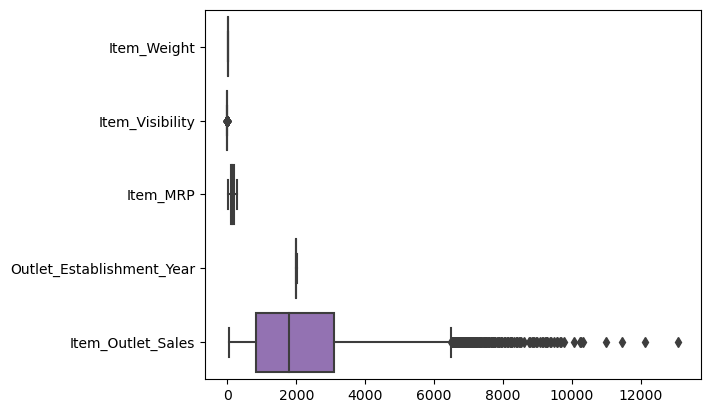

In [495]:
# Plotting Boxplots for training data 

sns.boxplot(data=train_data,orient="h")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

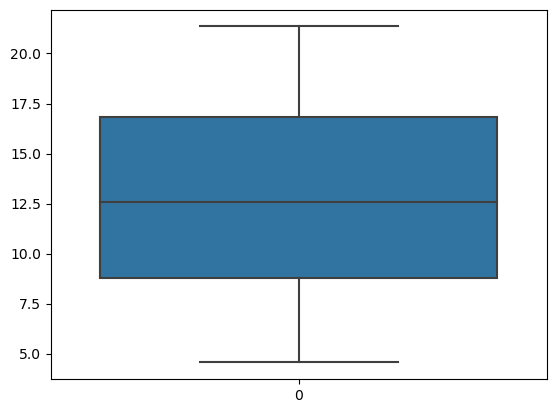

In [496]:

sns.boxplot(data=train_data["Item_Weight"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

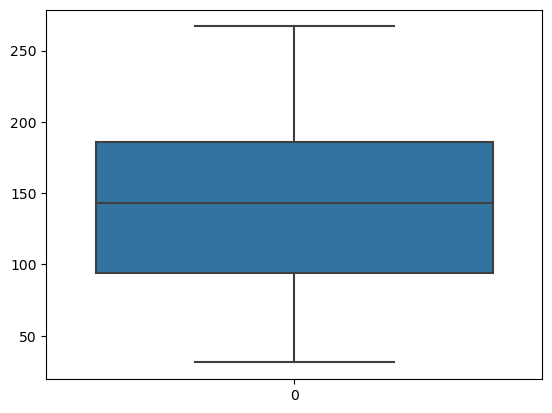

In [497]:

sns.boxplot(data=train_data["Item_MRP"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

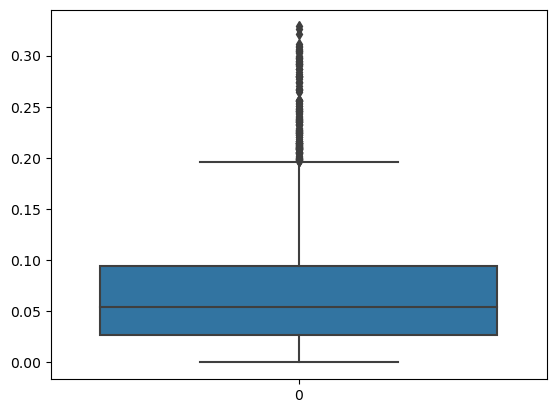

In [498]:

sns.boxplot(data=train_data["Item_Visibility"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

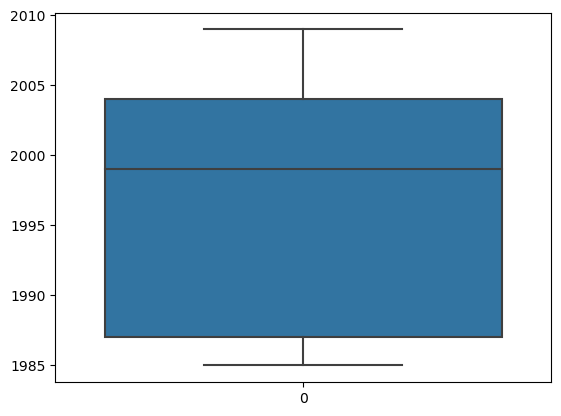

In [499]:

sns.boxplot(data=train_data["Outlet_Establishment_Year"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

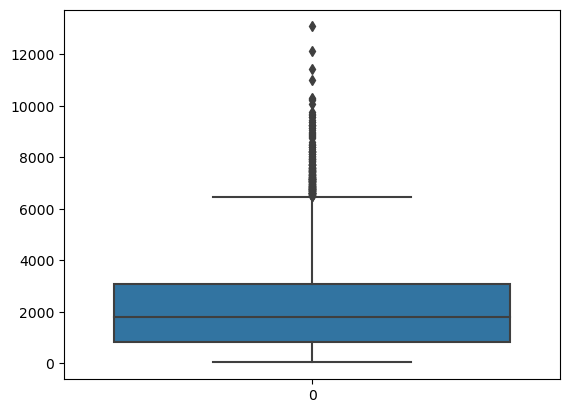

In [500]:
# Plotting Boxplots for training data

sns.boxplot(data=train_data["Item_Outlet_Sales"])
plt.show

## Attributes containing Outliers : Item_Outlet_Sales , Item_Visibility

In [501]:
# Function returnin threshold value for outliers
def remove_outlier(column_data):
    sorted(column_data)
    q1,q3=column_data.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [502]:
#capping outliers for Item_Outlet_Sales column 

lower_range,upper_range=remove_outlier(train_data["Item_Outlet_Sales"])
 
temp=train_data.copy()
temp[temp["Item_Outlet_Sales"]>upper_range]=upper_range

train_data["Item_Outlet_Sales"]=temp["Item_Outlet_Sales"]

In [503]:
train_data["Item_Outlet_Sales"].describe()

count    8523.000000
mean     2156.313016
std      1624.863069
min        33.290000
25%       834.247400
50%      1794.331000
75%      3101.296400
max      6501.869900
Name: Item_Outlet_Sales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

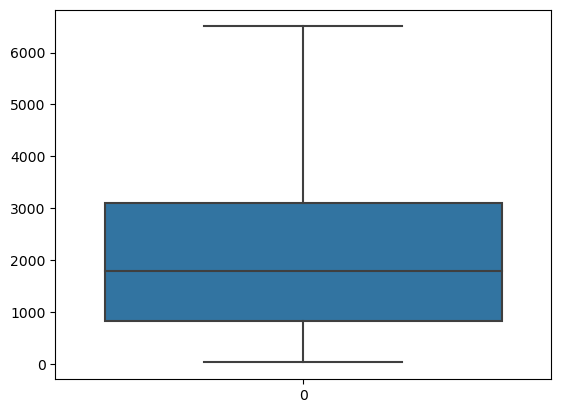

In [504]:
# Plotting Boxplots for training data after capping outliers

sns.boxplot(data=train_data["Item_Outlet_Sales"])
plt.show

In [505]:
#capping outliers for Item_Visibility column

lower_range,upper_range=remove_outlier(train_data["Item_Visibility"])
 
temp=train_data.copy()
temp[temp["Item_Visibility"]>upper_range]=upper_range

train_data["Item_Visibility"]=temp["Item_Visibility"]

In [506]:
train_data["Item_Visibility"].describe()

count    8523.000000
mean        0.065307
std         0.048841
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.195979
Name: Item_Visibility, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

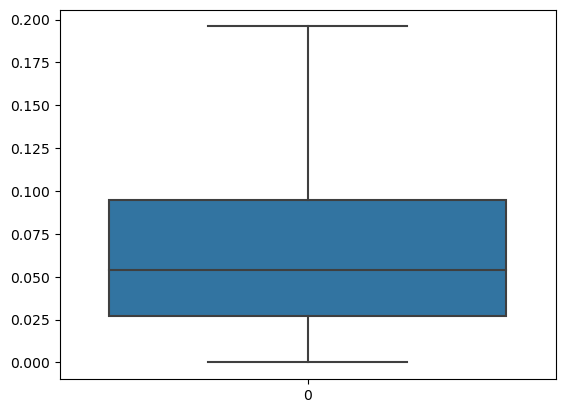

In [507]:
# Plotting Boxplots for training data after capping outliers

sns.boxplot(data=train_data["Item_Visibility"])
plt.show

## EDA - Graphs

### Univariate Analysis

In [508]:
categorical_columns= ['Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type','Item_Fat_Content', 'Item_Type'  ]
for categorical_col in categorical_columns:
    print(train_data[categorical_col].value_counts())
    print("\n")


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64




We observe that in Item_Fat_Content similar values are used in different forms .

In [509]:
# Cleaning values of Item_Fat_Content column

val1=["Low Fat","LF","low fat"]
val2=["Regular","reg"]

train_data["Item_Fat_Content"]=train_data["Item_Fat_Content"].replace(to_replace=val1,value="LowFat")
train_data["Item_Fat_Content"]=train_data["Item_Fat_Content"].replace(to_replace=val2,value="regularFat")

In [510]:
train_data["Item_Fat_Content"].value_counts()

LowFat        5517
regularFat    3006
Name: Item_Fat_Content, dtype: int64

C:\Users\sanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

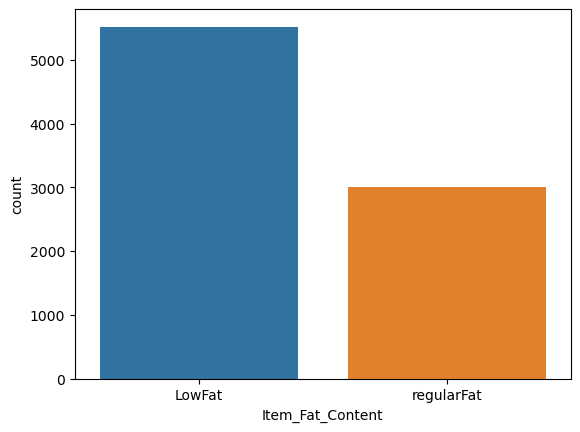

In [511]:
#plotting graphs
sns.countplot(train_data['Item_Fat_Content'])


This plot validates hypothesis that people are more likely to buy healthy products i.e low fat .

C:\Users\sanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

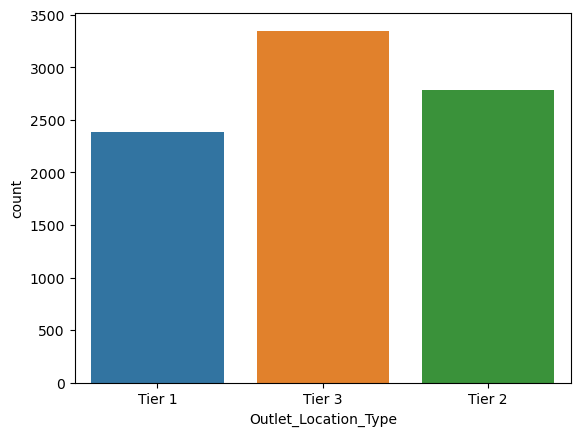

In [512]:
sns.countplot(train_data["Outlet_Location_Type"])



This plot shows that products in tier 3 cities are more sold than tier 2 and tier 1

C:\Users\sanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

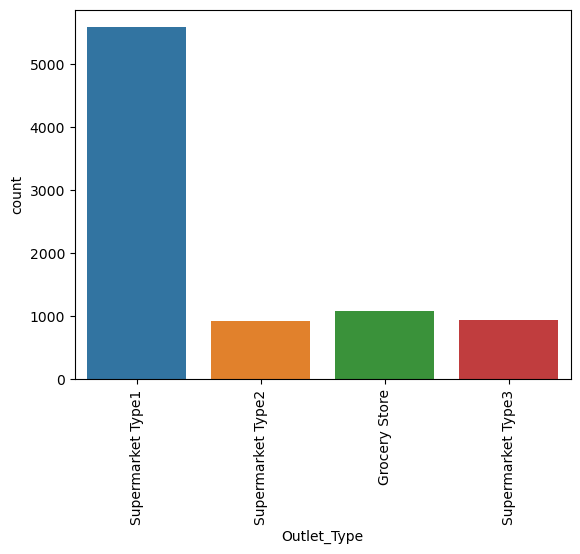

In [513]:
sns.countplot(train_data["Outlet_Type"]) 
plt.xticks(rotation=90)

This plot shows that products in supermarket type 1 are more sold .

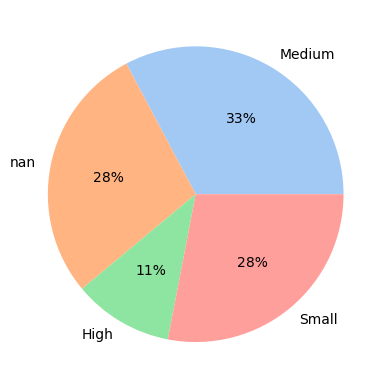

In [514]:
keys = collections.Counter(train_data['Outlet_Size']).keys()
data= collections.Counter(train_data['Outlet_Size']).values()


palette_color = sns.color_palette('pastel')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()



There are lot of nan values in outlet size column .

C:\Users\sanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

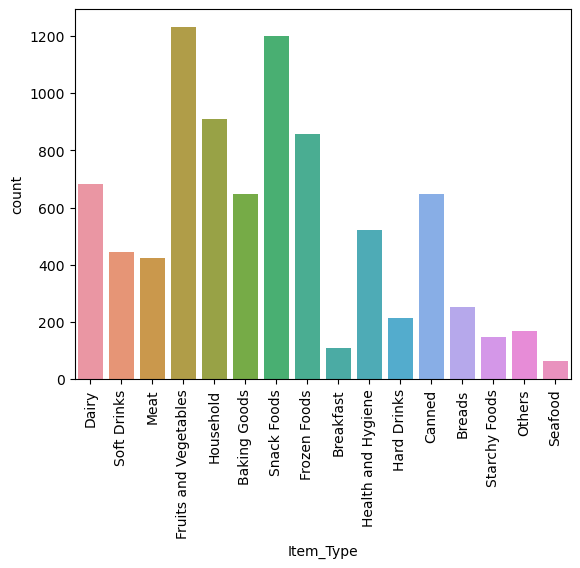

In [515]:
sns.countplot(train_data['Item_Type']) 
plt.xticks(rotation=90)

Most sold item category are :
1. Fruits and vegetables
2. snack foods
3. Household
4. Frozen Food

Least sold item category are: 
1. Seafood
2. Breakfast
3. Starchy foods

### Bivariate Analysis

In [516]:
#correlation among numeric features

train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013568,0.027141,-0.011588,0.014730
Item_Visibility,-0.013568,1.000000,-0.001163,-0.064105,-0.120418
Item_MRP,0.027141,-0.001163,1.000000,0.005020,0.574554
Outlet_Establishment_Year,-0.011588,-0.064105,0.005020,1.000000,-0.037133
Item_Outlet_Sales,0.014730,-0.120418,0.574554,-0.037133,1.000000


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

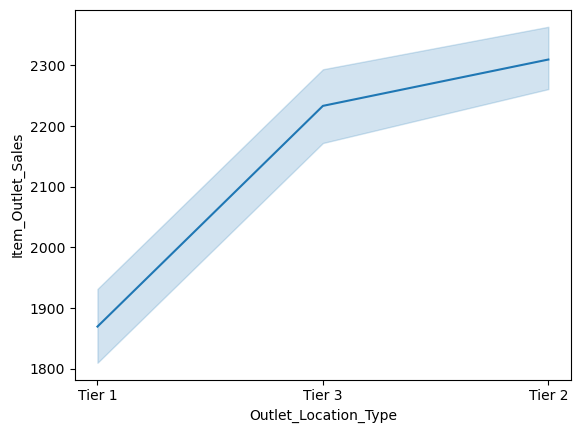

In [517]:
sns.lineplot(data=train_data, x='Outlet_Location_Type', y="Item_Outlet_Sales")

We conclude that even though more products are sold in tier 3 but tier 2 city sales are highest.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

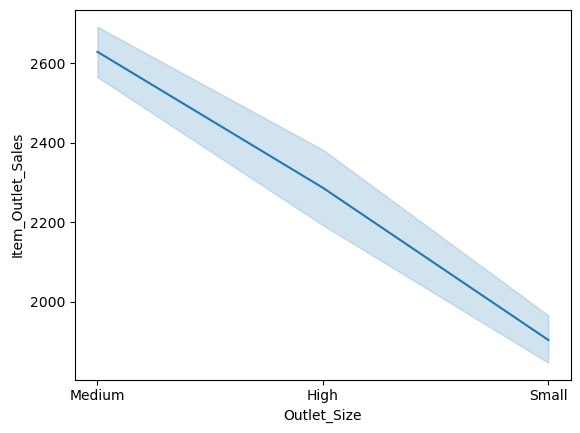

In [518]:
sns.lineplot(data=train_data, x='Outlet_Size', y="Item_Outlet_Sales")

Medium sized stores have highest sales.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

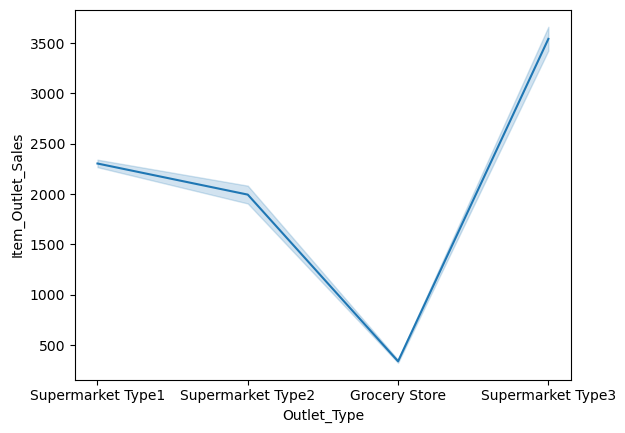

In [519]:
sns.lineplot(data=train_data, x='Outlet_Type', y="Item_Outlet_Sales") 

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

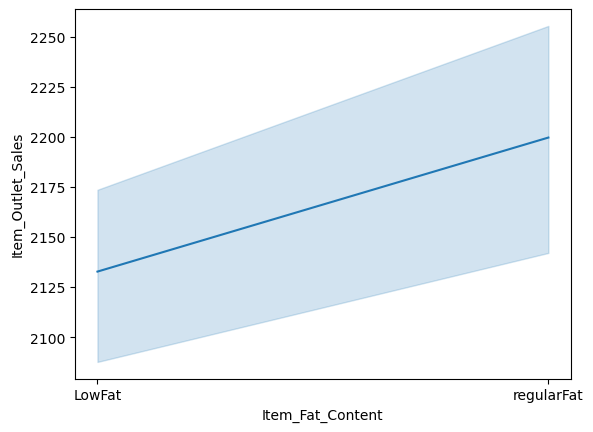

In [520]:
sns.lineplot(data=train_data, x='Item_Fat_Content', y="Item_Outlet_Sales")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

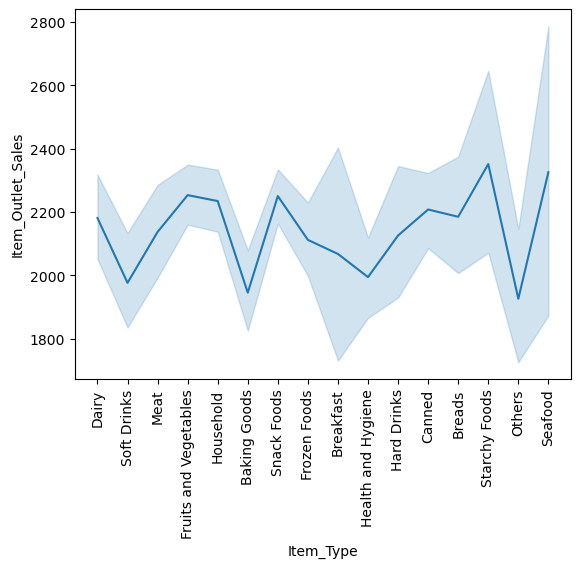

In [521]:
sns.lineplot(data=train_data, x='Item_Type', y="Item_Outlet_Sales")
plt.xticks(rotation=90)

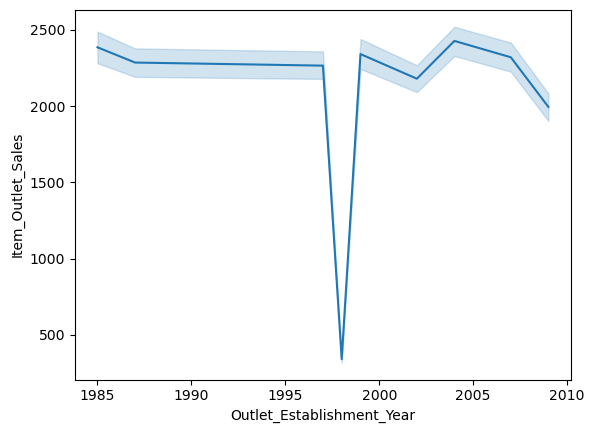

In [522]:
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_data)
plt.show()

Stores established between 1995 and 2000 have lowest sales. Stores established before 1995 have highest sales.

# Missing Value Treatment 

In [523]:
#Check for missing values in each column/attribute

train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [524]:
# handling missing values in Item_Weight

train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [525]:
# handling missing values in Outlet_Size

train_data['Outlet_Size'] = train_data['Outlet_Size'].replace(np.nan, train_data['Outlet_Size'].mode().values[0])

In [526]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Feature Engineering

In [527]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LowFat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regularFat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LowFat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regularFat,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LowFat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [528]:
train_data["Item_Identifier"].apply(lambda x: x[0:2]).unique()

array(['FD', 'DR', 'NC'], dtype=object)

We observe that two letter initials in Item_identifier column represents food ,drink and non-consumables. We will create new feature from this column .

In [529]:
#Generating new feature item_type_category 

train_data['Item_Type_category'] = train_data['Item_Identifier'].apply(lambda x: x[0:2])

train_data['Item_Type_category'] = train_data['Item_Type_category'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train_data['Item_Type_category'].value_counts()
     

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_category, dtype: int64

# Encoding Categorical Variables


In [530]:
#label encoding

label_encoder = LabelEncoder()

In [531]:

train_data['Outlet_Size']=label_encoder.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']=label_encoder.fit_transform(train_data['Outlet_Location_Type'])
train_data['Item_Fat_Content']=label_encoder.fit_transform(train_data['Item_Fat_Content'])


In [532]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_category
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,Food
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,Food
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,Food
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,2,Supermarket Type1,2778.3834,Food
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,Supermarket Type1,549.2850,Food
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1,Supermarket Type1,1193.1136,Non-Consumable
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,Supermarket Type2,1845.5976,Food


In [533]:
for col in ['Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_category']:
    temp_df=pd.get_dummies(train_data[col])
    train_data=pd.concat([train_data, temp_df], axis=1)
    train_data=train_data.drop(col,axis=1)

In [ ]:
#one hot encoding 
for col in ['Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_category']:
    temp_df=pd.get_dummies(train_data[col])
    train_data=pd.concat([train_data, temp_df], axis=1)
    train_data=train_data.drop(col,axis=1)



In [535]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Baking Goods,...,OUT045,OUT046,OUT049,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Drinks,Food,Non-Consumable
0,FDA15,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,0,...,0,0,1,0,1,0,0,0,1,0
1,DRC01,5.920,1,0.019278,48.2692,2009,1,2,443.4228,0,...,0,0,0,0,0,1,0,1,0,0
2,FDN15,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,0,...,0,0,1,0,1,0,0,0,1,0
3,FDX07,19.200,1,0.000000,182.0950,1998,1,2,732.3800,0,...,0,0,0,1,0,0,0,0,1,0
4,NCD19,8.930,0,0.000000,53.8614,1987,0,2,994.7052,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,0,...,0,0,0,0,1,0,0,0,1,0
8519,FDS36,8.380,1,0.046982,108.1570,2002,1,1,549.2850,1,...,1,0,0,0,1,0,0,0,1,0
8520,NCJ29,10.600,0,0.035186,85.1224,2004,2,1,1193.1136,0,...,0,0,0,0,1,0,0,0,0,1
8521,FDN46,7.210,1,0.145221,103.1332,2009,1,2,1845.5976,0,...,0,0,0,0,0,1,0,0,1,0


In [536]:
train_data=train_data.drop("Item_Identifier",axis=1)

In [537]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int32  
 6   Outlet_Location_Type       8523 non-null   int32  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Baking Goods               8523 non-null   uint8  
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

# PreProcessing Data

In [538]:
def preprocess(data):
    
    numerical_col = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
    scaler = StandardScaler()
    data[numerical_col] = scaler.fit_transform(data[numerical_col])
    

    x = data.drop('Item_Outlet_Sales', axis=1)
    y = data['Item_Outlet_Sales']
    
    return x, y

In [539]:
def preprocess_testdata(data):
    # Cleaning values of Item_Fat_Content column

    val1=["Low Fat","LF","low fat"]
    val2=["Regular","reg"]

    data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(to_replace=val1,value="LowFat")
    data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(to_replace=val2,value="regularFat")

    # handling missing values in Item_Weight

    data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

    # handling missing values in Outlet_Size

    data['Outlet_Size'] = data['Outlet_Size'].replace(np.nan, data['Outlet_Size'].mode().values[0])

    #Generating new feature item_type_category 

    data['Item_Type_category'] = data['Item_Identifier'].apply(lambda x: x[0:2])

    data['Item_Type_category'] = data['Item_Type_category'].map({'FD':'Food',
                                                                 'NC':'Non-Consumable',
                                                                 'DR':'Drinks'})
    data['Item_Type_category'].value_counts()

    #label encoding

    label_encoder = LabelEncoder()

    data['Outlet_Size']=label_encoder.fit_transform(data['Outlet_Size'])
    data['Outlet_Location_Type']=label_encoder.fit_transform(data['Outlet_Location_Type'])
    data['Item_Fat_Content']=label_encoder.fit_transform(data['Item_Fat_Content'])

    #one hot encoding 
    for col in ['Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_category']:
        temp_df=pd.get_dummies(data[col])
        data=pd.concat([data, temp_df], axis=1)
        data=data.drop(col,axis=1)

    test_data=data.drop("Item_Identifier",axis=1)
    return test_data

In [595]:
X,Y = preprocess(train_data)

# splitting into training set and test set 80%-20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)




# Modeling

In [596]:
#linear regression

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) 

print("Root Mean squared error:", rmse)
print("R2 score:", r2)

r2_dict={}
rmse_dict={}

r2_dict["lr"]=r2
rmse_dict["lr"]=rmse

#saving model
with open('Linear_regression.pkl', 'wb') as f:
    pickle.dump(linear_model, f)

Root Mean squared error: 1056.7074793926106
R2 score: 0.5633357288372777


In [597]:
#ridge regression
ridge_model = Ridge(alpha=0.5)

ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse) 

print("Root Mean squared error:", rmse)
print("R2 score:", r2)


r2_dict["ridge"]=r2
rmse_dict["ridge"]=rmse

#saving model
with open('Ridge_regression.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)

Root Mean squared error: 1056.1495618805616
R2 score: 0.5637967047173778


In [598]:
#randomforest 

rf_model = RandomForestRegressor(n_estimators=250, max_depth=5)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) 

print("Root Mean squared error:", rmse)
print("R2 score:", r2)


r2_dict["rf"]=r2
rmse_dict["rf"]=rmse

#saving model
with open('RandomForest_regression.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


Root Mean squared error: 1003.887270772152
R2 score: 0.6058985882806087


In [599]:
#xgboost

xgboost_model = XGBRegressor(n_estimators=150, max_depth=3, eta=0.2, subsample=0.7, colsample_bytree=0.5,seed = 42)
xgboost_model.fit(x_train, y_train)

y_pred = xgboost_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print("Root Mean squared error:", rmse)
print("R2 score:", r2)


r2_dict["xgb"]=r2
rmse_dict["xgb"]=rmse

#saving model
with open('XGBoost_regression.pkl', 'wb') as f:
    pickle.dump(xgboost_model, f)



Root Mean squared error: 1038.8046356004854
R2 score: 0.578006410517725


# Predicting sales on Test data

In [584]:
test_data=load_data("Test.csv")
test_data= preprocess_testdata(test_data)

In [585]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Baking Goods,Breads,Breakfast,...,OUT045,OUT046,OUT049,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Drinks,Food,Non-Consumable
0,20.750000,0,0.007565,107.8622,1999,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,8.300000,1,0.038428,87.3198,2007,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,14.600000,0,0.099575,241.7538,1998,1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,7.315000,0,0.015388,155.0340,2007,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,12.695633,1,0.118599,234.2300,1985,1,2,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,1997,2,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5677,7.600000,1,0.142991,169.1448,2009,1,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5678,10.000000,0,0.073529,118.7440,2002,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5679,15.300000,1,0.000000,214.6218,2007,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [586]:
sales_pred_linear_regression = linear_model.predict(test_data)
sales_pred_ridge = ridge_model.predict(test_data) 
sales_pred_random_forest = rf_model.predict(test_data) 
sales_pred_xgb = xgboost_model.predict(test_data)


In [603]:
r2_dict

{'lr': 0.5633357288372777,
 'ridge': 0.5637967047173778,
 'rf': 0.6058985882806087,
 'xgb': 0.578006410517725}

# Summary

In [612]:
result_dict={key:[r2_dict[key],rmse_dict[key]] for key in r2_dict}

In [613]:
result_dict

{'lr': [0.5633357288372777, 1056.7074793926106],
 'ridge': [0.5637967047173778, 1056.1495618805616],
 'rf': [0.6058985882806087, 1003.887270772152],
 'xgb': [0.578006410517725, 1038.8046356004854]}

In [616]:
result_df=pd.DataFrame.from_dict(result_dict)

In [624]:
result_df=result_df.rename(index={0: "r2_score", 1: "rmse"},columns={'lr': 'Linear Regression', 'ridge': "Ridge Regression", 'rf': "Random Forest","xgb":"Xgboost"})

In [625]:
result_df

,Linear Regression,Ridge Regression,Random Forest,Xgboost
r2_score,0.563336,0.563797,0.605899,0.578006
rmse,1056.707479,1056.149562,1003.887271,1038.804636
